In [601]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=8,8
import scipy.io
import pandas as pd
from scipy import ndimage, misc
from gpx_converter import Converter
import sys
np.set_printoptions(threshold=sys.maxsize)

In [187]:
GPX_File = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/GH011028_1_GPS5.gpx'
Calculated_coords = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/coordinates_GH011028.csv'
Calculated_Trajectory = pickle.load(open("C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/trajectory_map_GH011028.bin", "rb"))

2033


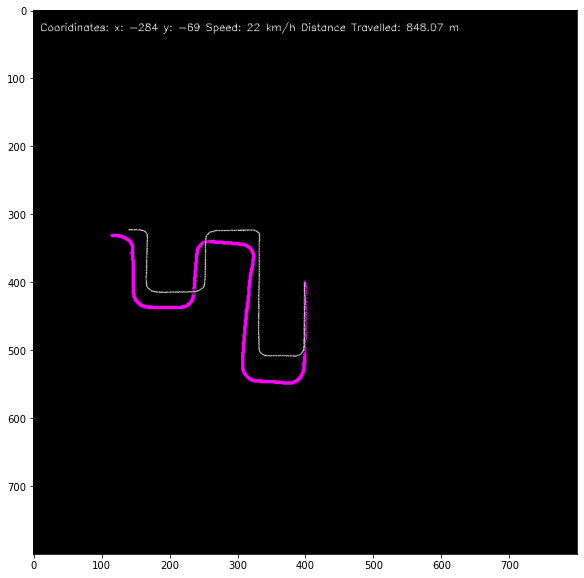

In [216]:
#Velocity = Constant - GH011028.mp4 without scaling
overlay_map(GPX_File, Calculated_Trajectory, Calculated_coords, Rot_Angle=-57,VERT_SCALE=1, HOR_SCALE=1)

<class 'numpy.ndarray'>


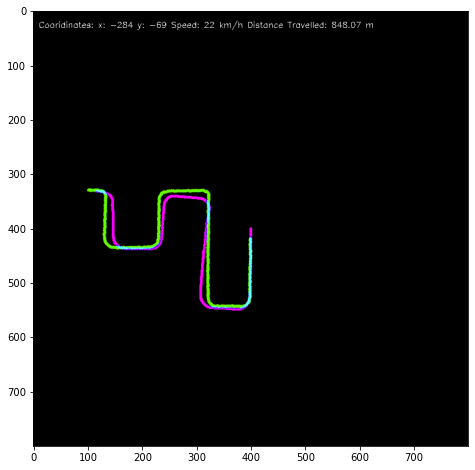

In [639]:
#Velocity = Constant - GH011028.mp4 with scaling
overlay_map(GPX_File, Calculated_Trajectory, Calculated_coords, Rot_Angle=-57,VERT_SCALE=1.15,HOR_SCALE=1.15,VERT_SHIFT=10, HOR_SHIFT=15)

In [612]:
GPX_File2 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/GH011027_1_GPS5.gpx'
Calculated_coords2 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/coordinatesGH011027.csv'
Calculated_Trajectory2 = pickle.load(open("C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/trajectory_map_GH011027.bin", "rb"))

<class 'numpy.ndarray'>


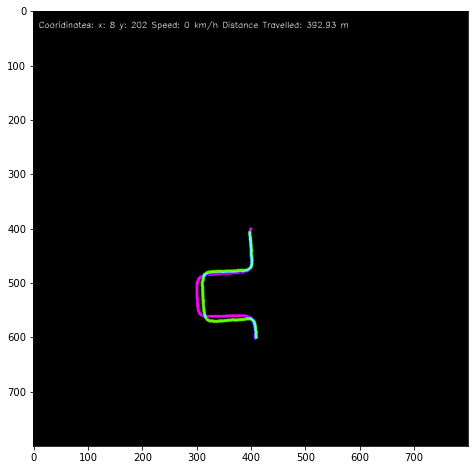

In [638]:
#Velocity = Constant - GH011027.mp4
overlay_map(GPX_File2, Calculated_Trajectory2, Calculated_coords2, Rot_Angle=-143,VERT_SCALE=1.05, HOR_SCALE=1.05,VERT_SHIFT=-5,HOR_SHIFT=5)

In [428]:
GPX_File3 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/GH011028_1_GPS5.gpx'
Calculated_coords3 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/coordinates_GH011028_vel_notconstant.csv'
Calculated_Trajectory3 = pickle.load(open("C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/trajectory_map_GH011028_vel_notconstant.bin", "rb"))

<class 'numpy.ndarray'>


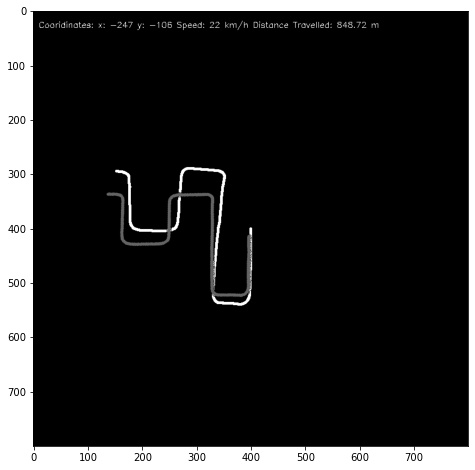

In [624]:

#Velocity = Not Constant - GH011028.mp4
overlay_map(GPX_File3, Calculated_Trajectory3, Calculated_coords3, Rot_Angle=-57,VERT_SCALE=1, HOR_SCALE=1, VERT_SHIFT=10,HOR_SHIFT=10)

In [634]:
def overlay_map(GPX_File, Calculated_Trajectory, Calculated_coords, Rot_Angle=-57, VERT_SCALE=1, HOR_SCALE=1,VERT_SHIFT=0,HOR_SHIFT=0):
    if Calculated_Trajectory.ndim == 3:
        gps_map = np.zeros((800,800,3), dtype=np.uint8)
        new_map = np.zeros((800,800,3), dtype=np.uint8)
    else:
        gps_map = np.zeros((800,800), dtype=np.uint8)
        new_map = np.zeros((800,800), dtype=np.uint8)
        
    gpx_dic = Converter(input_file=GPX_File).gpx_to_dictionary() #Actual GPS Coordinates
    columns = ["x", "y"]
    coords_df = pd.read_csv(Calculated_coords, usecols=columns)
    calculated_x = coords_df.x.to_numpy() #x,y coordinates of calculated trajectory
    calculated_y = coords_df.y.to_numpy()
    
    gps_lat = np.array(gpx_dic['latitude']) #Latitude and Longitude of Actual GPS Coordinates
    gps_long= np.array(gpx_dic['longitude'])
    
    lat_to_y = 6371*np.cos(np.radians(gps_lat))*np.cos(np.radians(gps_long)) #Converting to X Y Coordinates
    long_to_x = 6371*np.cos(np.radians(gps_lat))*np.sin(np.radians(gps_long))
    
    lat_to_y_map = abs(lat_to_y + int(abs(min(lat_to_y))))*1000 #Convert to Relative X Y in meters
    long_to_x_map = abs(long_to_x + int(abs(min(long_to_x))))*1000
    
    print(type(lat_to_y_map))
    #lat_x = (map(int,lat_to_x_map)) #Convert list to integers
    #long_y = (map(int,long_to_y_map))
    #print(lat_x)
    #coords = tuple(zip(lat_x,long_y))
    #coords = list(set(coords))
    
    lat_y = lat_to_y_map.astype(int)*VERT_SCALE
    #print(lat_x)
    long_x = long_to_x_map.astype(int)*HOR_SCALE

        
    for i in range(0,len(lat_y)): #Create Plot for GPS X Y Map such that starting point is the same
        row = int(lat_y[i])-(int(lat_y[0])-calculated_x[0])+VERT_SHIFT
        col = int(long_x[i])-(int(long_x[0])-calculated_y[0])+HOR_SHIFT
        
        cv2.circle(gps_map, (col,row), 1, (100,255,0),2)
        #gps_map[int(lat_y[i])-(int(lat_y[0])-calculated_x[0])+VERT_SHIFT, int(long_x[i])-(int(long_x[0])-calculated_y[0])+HOR_SHIFT] = 255 
        #gps_map[int(lat_y[i])+VERT_SHIFT, int(long_x[i])+HOR_SHIFT] = 255
        #gps_map[int(coords[i][0]*VERT_SCALE), int(coords[i][1]*HOR_SCALE)] = 255
    '''
    i,j = np.where(gps_map != 0)
    x = j*HOR_SCALE
    y = i*VERT_SCALE
    
    for k in range(0,len(x)): 
        new_map[int(x[k]), int(y[k])] = 255
    ''' 
    gps_map2 = ndimage.rotate(gps_map, Rot_Angle, reshape=False) #Rotate GPS Map
    
    overlap = gps_map2 + Calculated_Trajectory
    
    plt.imshow(overlap, cmap='gray')
    
    return overlap

In [338]:
type(gps_lat)

list

In [496]:
GPX_File2 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/GH011027_1_GPS5.gpx'
gpx_dic = Converter(input_file=GPX_File).gpx_to_dictionary() #Actual GPS Coordinates
columns = ["x", "y"]
coords_df = pd.read_csv(Calculated_coords, usecols=columns)

gps_lat = np.array(gpx_dic['latitude']) #Latitude and Longitude of Actual GPS Coordinates
gps_long= np.array(gpx_dic['longitude'])

lat_to_x = 6371*np.cos(np.radians(gps_lat))*np.cos(np.radians(gps_long)) #Converting to X Y Coordinates
long_to_y = 6371*np.cos(np.radians(gps_lat))*np.sin(np.radians(gps_long))

lat_to_x_map = abs(lat_to_x + int(abs(min(lat_to_x))))*1000 #Convert to Relative X Y in meters
long_to_y_map = abs(long_to_y + int(abs(min(long_to_y))))*1000

lat_x = lat_to_x_map.astype(int)
long_y = long_to_y_map.astype(int)

coords = tuple(zip(lat_x,long_y))
len(coords)

2033

In [490]:
new_array = np.array(list(set(tuple(p) for p in coords)))

In [501]:
y = list(set(coords))
y[0]

(689, 460)

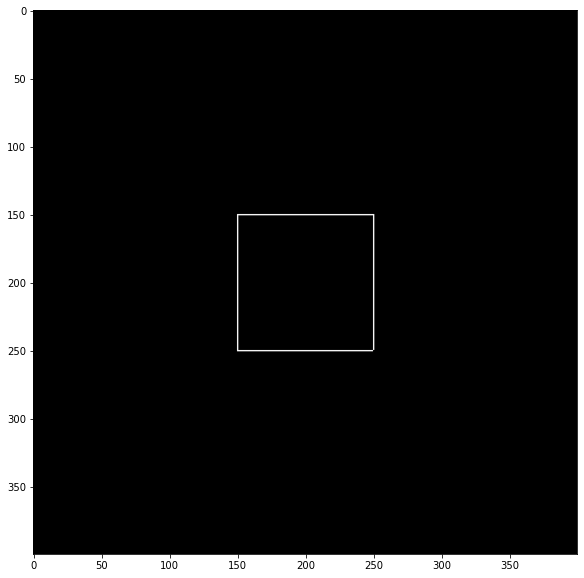

In [378]:
x = 400
y = 400
box = np.zeros((x,y), dtype=np.uint8)
box[150:250,150] = 255
box[150:250,250] = 255
box[150,150:250] = 255
box[250,150:250] = 255

plt.imshow(box, cmap='gray')

In [448]:
i,j = np.where(box != 0)



In [553]:
new_x = i*1.5
new_y = j*1


In [575]:
New_Map = np.zeros((400,400), dtype=np.uint8)
for k in range(0,len(j)): 
        New_Map[int(new_x[k])-100, int(new_y[k])+50] = 255

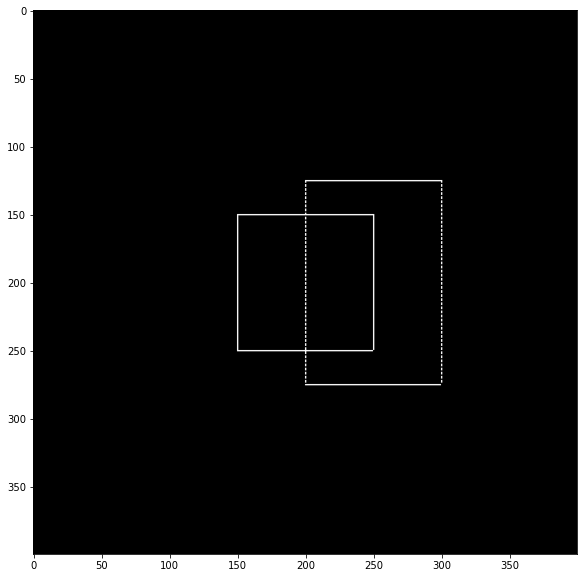

In [576]:

plt.imshow(New_Map+box, cmap='gray')

In [640]:
frame = np.zeros((800,600,3))

In [643]:
frame.shape

(800, 600, 3)

In [644]:
x = np.zeros((10,1))

In [645]:
x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [646]:
x[(1:2),(7:9)] = 1

SyntaxError: invalid syntax (<ipython-input-646-69ab983bae0a>, line 1)

In [647]:
10:20,40:10

SyntaxError: invalid syntax (<ipython-input-647-f726110ea350>, line 1)